<a href="https://colab.research.google.com/github/rikasah/unemployee-rate-and-data-science-skill-demand/blob/main/Project_BDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pengangguran Terbuka

TPT (Tingkat Pengangguran Terbuka) adalah persentase jumlah pengangguran terhadap jumlah angkatan kerja

##Basic Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tpt = pd.read_csv('/content/Pengangguran_1986-2018.csv',delimiter=';')

In [ ]:
tpt.head()

,Provinsi,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aceh,"2,40","1,67","2,09","3,21","2,28","2,44","1,96","4,01","5,51",-,"6,47","5,24","6,21","7,56","4,80","7,71","9,34","8,97","9,35","14,00","10,43","9,84","9,56","8,71","8,37","9,00","9,06","10,12","9,02","9,93","7,57","6,57","6,36"
1,Sumatera Utara,"2,38","1,88","2,30","2,43","2,44","2,85","2,84","3,20","5,05",-,"6,32","5,19","7,06","7,67","8,52","9,09","10,30","11,02","11,08","11,90","11,51","10,10","9,10","8,45","7,43","8,18","6,28","6,45","6,23","6,71","5,84","5,60","5,56"
2,Sumatera Barat,"2,27","1,90","2,32","2,73","2,53","3,01","2,95","2,45","5,24",-,"4,72","4,54","5,11","5,88","4,38","8,74","9,62","10,38","12,74","13,34","11,87","10,31","8,04","7,97","6,95","8,02","6,65","7,02","6,50","6,89","5,09","5,58","5,55"
3,Riau,"4,01","3,94","3,69","3,88","3,05","3,00","3,54","3,60","5,30",-,"5,94","5,91","5,76","7,62","5,93","6,43","9,57","10,74","15,25","12,16","10,24","9,79","8,20","8,56","8,72","6,09","4,37","5,48","6,56","7,83","7,43","6,22","6,20"
4,Jambi,"2,38","1,37","2,57","2,26","1,92","2,39","1,96","1,80","2,79",-,"3,80","4,06","2,59","3,47","3,68","5,61","5,78","6,50","6,04","10,74","6,62","6,22","5,14","5,54","5,39","4,63","3,20","4,76","5,08","4,34","4,00","3,87","3,86"


In [ ]:
tpt=tpt.drop(tpt.loc[:, ' 1986 ':' 2010 '].columns, axis = 1)

In [ ]:
tpt.columns = tpt.columns.str.replace(' ', '')

In [ ]:
tpt.columns

Index(['Provinsi', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [ ]:
tpt=tpt.drop(labels=23, axis=0)

In [ ]:
tpt.shape

(33, 9)

##Prepare and Cleaning Data

In [ ]:
tpt['2011']=tpt['2011'].str.strip()
tpt['2012']=tpt['2012'].str.strip()
tpt['2013']=tpt['2013'].str.strip()
tpt['2014']=tpt['2014'].str.strip()
tpt['2015']=tpt['2015'].str.strip()
tpt['2016']=tpt['2016'].str.strip()
tpt['2017']=tpt['2017'].str.strip()
tpt['2018']=tpt['2018'].str.strip()

In [ ]:
tpt['2011']=tpt['2011'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2012']=tpt['2012'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2013']=tpt['2013'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2014']=tpt['2014'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2015']=tpt['2015'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2016']=tpt['2016'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2017']=tpt['2017'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
tpt['2018']=tpt['2018'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

In [ ]:
tpt

,Provinsi,2011,2012,2013,2014,2015,2016,2017,2018
0,Aceh,9.00,9.06,10.12,9.02,9.93,7.57,6.57,6.36
1,Sumatera Utara,8.18,6.28,6.45,6.23,6.71,5.84,5.60,5.56
2,Sumatera Barat,8.02,6.65,7.02,6.50,6.89,5.09,5.58,5.55
3,Riau,6.09,4.37,5.48,6.56,7.83,7.43,6.22,6.20
4,Jambi,4.63,3.20,4.76,5.08,4.34,4.00,3.87,3.86
5,Sumatera Selatan,6.60,5.66,4.84,4.96,6.07,4.31,4.39,4.23
6,Bengkulu,3.46,3.62,4.61,3.47,4.91,3.30,3.74,3.51
7,Lampung,6.38,5.20,5.69,4.79,5.14,4.62,4.33,4.06
8,Kepulauan Bangka Belitung,3.86,3.43,3.65,5.14,6.29,2.60,3.78,3.65
9,Kepulauan Riau,5.38,5.08,5.63,6.69,6.20,7.69,7.16,7.12


In [ ]:
tpt1 = tpt.set_index('Provinsi').T.rename_axis('Year').rename_axis(None, axis=1).reset_index()

In [ ]:
tpt1

,Year,Aceh,Sumatera Utara,Sumatera Barat,Riau,Jambi,Sumatera Selatan,Bengkulu,Lampung,Kepulauan Bangka Belitung,Kepulauan Riau,DKI Jakarta,Jawa Barat,Jawa Tengah,DI Yogyakarta,Jawa Timur,Banten,Bali,Nusa Tenggara Barat,Nusa Tengggara Timur,Kalimantan Barat,Kalimantan Tengah,Kalimantan Selatan,Kalimantan Timur,Sulawesi Utara,Sulawesi Tengah,Sulawesi Selatan,Sulawesi Tenggara,Gorontalo,Sulawesi Barat,Maluku,Maluku Utara,Papua Barat,Papua
0,2011,9.00,8.18,8.02,6.09,4.63,6.60,3.46,6.38,3.86,5.38,11.69,9.96,7.07,4.39,5.38,13.74,2.95,5.25,3.11,4.60,3.54,6.29,11.43,10.10,6.78,8.13,4.69,6.74,3.35,10.81,5.34,6.73,5.02
1,2012,9.06,6.28,6.65,4.37,3.20,5.66,3.62,5.20,3.43,5.08,9.67,9.08,5.61,3.90,4.11,9.94,2.10,5.23,3.04,3.54,3.14,5.19,9.02,7.98,3.95,6.01,4.14,4.47,2.16,7.71,4.82,5.42,3.71
2,2013,10.12,6.45,7.02,5.48,4.76,4.84,4.61,5.69,3.65,5.63,8.63,9.16,6.01,3.24,4.30,9.54,1.83,5.30,3.25,3.99,3.00,3.66,7.95,6.79,4.19,5.10,4.38,4.15,2.35,9.91,3.80,4.40,3.15
3,2014,9.02,6.23,6.50,6.56,5.08,4.96,3.47,4.79,5.14,6.69,8.47,8.45,5.68,3.33,4.19,9.07,1.90,5.75,3.26,4.04,3.24,3.80,7.38,7.54,3.68,5.08,4.43,4.18,2.08,10.51,5.29,5.02,3.44
4,2015,9.93,6.71,6.89,7.83,4.34,6.07,4.91,5.14,6.29,6.20,7.23,8.72,4.99,4.07,4.47,9.55,1.99,5.69,3.83,5.15,4.54,4.92,7.50,9.03,4.10,5.95,5.55,4.65,3.35,9.93,6.05,8.08,3.99
5,2016,7.57,5.84,5.09,7.43,4.00,4.31,3.30,4.62,2.60,7.69,6.12,8.89,4.63,2.72,4.21,8.92,1.89,3.94,3.25,4.23,4.82,5.45,7.95,6.18,3.29,4.80,2.72,2.76,3.33,7.05,4.01,7.46,3.35
6,2017,6.57,5.60,5.58,6.22,3.87,4.39,3.74,4.33,3.78,7.16,7.14,8.22,4.57,3.02,4.00,9.28,1.48,3.32,3.27,4.36,4.23,4.77,6.91,7.18,3.81,5.61,3.30,4.28,3.21,9.29,5.33,6.49,3.62
7,2018,6.36,5.56,5.55,6.20,3.86,4.23,3.51,4.06,3.65,7.12,6.24,8.17,4.51,3.35,3.99,8.52,1.37,3.72,3.01,4.26,4.01,4.50,6.60,6.86,3.43,5.34,3.26,4.03,3.16,7.27,4.77,6.30,3.20


In [ ]:
tpt1.columns

Index(['Year', ' Aceh ', ' Sumatera Utara ', ' Sumatera Barat ', ' Riau ',
       ' Jambi ', ' Sumatera Selatan ', ' Bengkulu ', ' Lampung ',
       ' Kepulauan Bangka Belitung ', ' Kepulauan Riau ', ' DKI Jakarta ',
       ' Jawa Barat ', ' Jawa Tengah ', ' DI Yogyakarta ', ' Jawa Timur ',
       ' Banten ', ' Bali ', ' Nusa Tenggara Barat ', ' Nusa Tengggara Timur ',
       ' Kalimantan Barat ', ' Kalimantan Tengah ', ' Kalimantan Selatan ',
       ' Kalimantan Timur ', ' Sulawesi Utara ', ' Sulawesi Tengah ',
       ' Sulawesi Selatan ', ' Sulawesi Tenggara ', ' Gorontalo ',
       ' Sulawesi Barat ', ' Maluku ', ' Maluku Utara ', ' Papua Barat ',
       ' Papua '],
      dtype='object')

In [ ]:
tpt1.columns = tpt1.columns.str.replace(' ', '')

In [ ]:
tpt1.columns

Index(['Year', 'Aceh', 'SumateraUtara', 'SumateraBarat', 'Riau', 'Jambi',
       'SumateraSelatan', 'Bengkulu', 'Lampung', 'KepulauanBangkaBelitung',
       'KepulauanRiau', 'DKIJakarta', 'JawaBarat', 'JawaTengah',
       'DIYogyakarta', 'JawaTimur', 'Banten', 'Bali', 'NusaTenggaraBarat',
       'NusaTengggaraTimur', 'KalimantanBarat', 'KalimantanTengah',
       'KalimantanSelatan', 'KalimantanTimur', 'SulawesiUtara',
       'SulawesiTengah', 'SulawesiSelatan', 'SulawesiTenggara', 'Gorontalo',
       'SulawesiBarat', 'Maluku', 'MalukuUtara', 'PapuaBarat', 'Papua'],
      dtype='object')

In [ ]:
tpt2 = tpt1.drop(['Aceh', 'SumateraUtara', 'SumateraBarat', 'Riau', 'Jambi',
       'SumateraSelatan', 'Bengkulu', 'Lampung', 'KepulauanBangkaBelitung',
       'KepulauanRiau','Banten', 'NusaTenggaraBarat',
       'NusaTengggaraTimur', 'KalimantanBarat', 'KalimantanTengah',
       'KalimantanSelatan', 'KalimantanTimur', 'SulawesiUtara',
       'SulawesiTengah', 'SulawesiSelatan', 'SulawesiTenggara', 'Gorontalo',
       'SulawesiBarat', 'Maluku', 'MalukuUtara', 'PapuaBarat', 'Papua'], axis = 1)

In [ ]:
tpt2

,Year,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali
0,2011,11.69,9.96,7.07,4.39,5.38,2.95
1,2012,9.67,9.08,5.61,3.90,4.11,2.10
2,2013,8.63,9.16,6.01,3.24,4.30,1.83
3,2014,8.47,8.45,5.68,3.33,4.19,1.90
4,2015,7.23,8.72,4.99,4.07,4.47,1.99
5,2016,6.12,8.89,4.63,2.72,4.21,1.89
6,2017,7.14,8.22,4.57,3.02,4.00,1.48
7,2018,6.24,8.17,4.51,3.35,3.99,1.37


In [ ]:
tpt2.describe()

,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,8.148750,8.831250,5.383750,3.502500,4.331250,1.938750
std,1.882638,0.587499,0.888288,0.565022,0.451962,0.478224
min,6.120000,8.170000,4.510000,2.720000,3.990000,1.370000
25%,6.915000,8.392500,4.615000,3.185000,4.082500,1.742500
50%,7.850000,8.805000,5.300000,3.340000,4.200000,1.895000
75%,8.890000,9.100000,5.762500,3.942500,4.342500,2.017500
max,11.690000,9.960000,7.070000,4.390000,5.380000,2.950000


##Create Line Chart

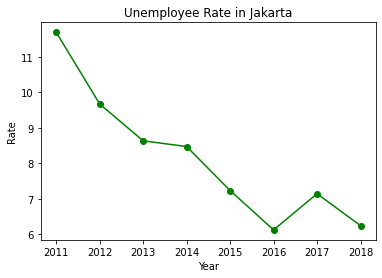

In [ ]:
# plot a line chart
plt.plot(tpt2["Year"], tpt2["DKIJakarta"], 'o-g')
# set axis titles
plt.xlabel("Year")
plt.ylabel("Rate")
# set chart title
plt.title("Unemployee Rate in Jakarta")
plt.show()

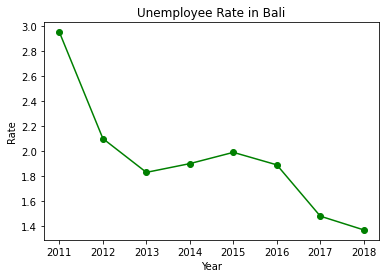

In [ ]:
# plot a line chart
plt.plot(tpt2["Year"], tpt2["Bali"], 'o-g')
# set axis titles
plt.xlabel("Year")
plt.ylabel("Rate")
# set chart title
plt.title("Unemployee Rate in Bali")
plt.show()

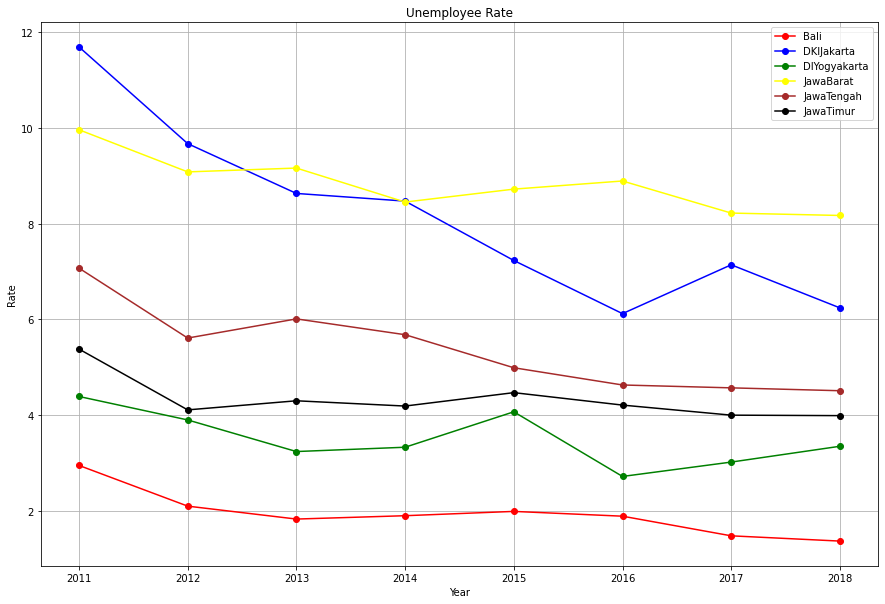

In [ ]:
from matplotlib.pyplot import figure
#Set Size
figure(figsize=(15,10))
# plot a line chart
plt.plot(tpt2["Year"], tpt2["Bali"], 'o-g',color='red')
plt.plot(tpt2["Year"], tpt2["DKIJakarta"], 'o-g',color='blue')
plt.plot(tpt2["Year"], tpt2["DIYogyakarta"], 'o-g',color='green')
plt.plot(tpt2["Year"], tpt2["JawaBarat"], 'o-g',color='yellow')
plt.plot(tpt2["Year"], tpt2["JawaTengah"], 'o-g',color='brown')
plt.plot(tpt2["Year"], tpt2["JawaTimur"], 'o-g',color='black')

# show legend
plt.legend(["Bali", "DKIJakarta", "DIYogyakarta","JawaBarat","JawaTengah","JawaTimur"])
# set axis titles
plt.xlabel("Year")
plt.ylabel("Rate")
# set chart title
plt.title("Unemployed Rate")
#Show Grid
plt.grid()

plt.show()

##Plot with Scaling the data

In [ ]:
scale = MinMaxScaler()
scaled_df = pd.DataFrame(scale.fit_transform(tpt2), columns = tpt2.columns, index = tpt2.index)    

In [ ]:
scaled_df.head()

,Year,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali
0,0.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.14,0.64,0.51,0.43,0.71,0.09,0.46
2,0.29,0.45,0.55,0.59,0.31,0.22,0.29
3,0.43,0.42,0.16,0.46,0.37,0.14,0.34
4,0.57,0.20,0.31,0.19,0.81,0.35,0.39


In [ ]:
scaled_df['Year']=tpt1['Year']

In [ ]:
scaled_df.head()

,Year,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali
0,2011,1.00,1.00,1.00,1.00,1.00,1.00
1,2012,0.64,0.51,0.43,0.71,0.09,0.46
2,2013,0.45,0.55,0.59,0.31,0.22,0.29
3,2014,0.42,0.16,0.46,0.37,0.14,0.34
4,2015,0.20,0.31,0.19,0.81,0.35,0.39


In [ ]:
scaled_df.columns

Index(['Year', 'DKIJakarta', 'JawaBarat', 'JawaTengah', 'DIYogyakarta',
       'JawaTimur', 'Bali'],
      dtype='object')

In [ ]:
scaled_df["Mean"]= scaled_df[['DKIJakarta', 'JawaBarat', 'JawaTengah', 'DIYogyakarta',
       'JawaTimur', 'Bali']].mean(axis=1)
scaled_df.head()

,Year,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali,Mean
0,2011,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,2012,0.64,0.51,0.43,0.71,0.09,0.46,0.47
2,2013,0.45,0.55,0.59,0.31,0.22,0.29,0.40
3,2014,0.42,0.16,0.46,0.37,0.14,0.34,0.31
4,2015,0.20,0.31,0.19,0.81,0.35,0.39,0.37


In [ ]:
scaled_df = scaled_df.set_index('Year', drop=False)
scaled_df.head()

,Year,DKIJakarta,JawaBarat,JawaTengah,DIYogyakarta,JawaTimur,Bali,Mean
Year,,,,,,,,
2011,2011,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2012,2012,0.64,0.51,0.43,0.71,0.09,0.46,0.47
2013,2013,0.45,0.55,0.59,0.31,0.22,0.29,0.40
2014,2014,0.42,0.16,0.46,0.37,0.14,0.34,0.31
2015,2015,0.20,0.31,0.19,0.81,0.35,0.39,0.37


In [ ]:
num_sites = 8

y_DKIJakarta = scaled_df.iloc[:num_sites, 1]
y_JawaBarat = scaled_df.iloc[:num_sites, 2]
y_JawaTengah = scaled_df.iloc[:num_sites, 3]
y_DIYogyakarta = scaled_df.iloc[:num_sites, 4]
y_JawaTimur = scaled_df.iloc[:num_sites, 5]
y_Bali = scaled_df.iloc[:num_sites, 6]

y_Bali

Year
2011   1.00
2012   0.46
2013   0.29
2014   0.34
2015   0.39
2016   0.33
2017   0.07
2018   0.00
Name: Bali, dtype: float64

In [ ]:
DKIJakarta = go.Bar(x=scaled_df.index, y=y_DKIJakarta, name = "DKIJakarta")
JawaBarat = go.Bar(x=scaled_df.index, y=y_JawaBarat, name="JawaBarat")
JawaTengah = go.Bar(x=scaled_df.index, y=y_JawaTengah, name="JawaTengah")
DIYogyakarta = go.Bar(x=scaled_df.index, y=y_DIYogyakarta, name="DIYogyakarta")
JawaTimur = go.Bar(x=scaled_df.index, y=y_JawaTimur, name="JawaTimur")
Bali = go.Bar(x=scaled_df.index, y=y_Bali, name="Bali")

data = [DKIJakarta, JawaBarat, JawaTengah, DIYogyakarta, JawaTimur, Bali]

layout = go.Layout(
    barmode='group',
    title="Unemployed Rate Each Year",
    xaxis={'title': 'Year'},
    yaxis={'title': "Scaled Rate", 'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#Digital Skill List with High Demand

##Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

In [ ]:
# for color scales in plotly
import colorlover as cl 

# configure things
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

##Import Dataset

In [ ]:
dft = pd.read_csv('/content/ds_job_listing_software.csv')
dft

,Keyword,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,Avg %,GlassDoor Self Reported % 2017,Difference
0,Python,"6,347","3,818","2,888","2,544",74%,74%,75%,68%,73%,72%,1%
1,R,"4,553","3,106","2,393","2,365",53%,60%,62%,63%,60%,64%,-4%
2,SQL,"3,879","2,628","2,056","1,841",45%,51%,54%,49%,50%,51%,-1%
3,Spark,"2,169","1,551","1,167","1,062",25%,30%,30%,28%,29%,27%,2%
4,Hadoop,"2,142","1,578","1,164","1,200",25%,31%,30%,32%,30%,39%,-9%
5,Java,"1,944","1,377","1,059","1,002",23%,27%,28%,27%,26%,33%,-7%
6,SAS,"1,713","1,134",910,978,20%,22%,24%,26%,23%,30%,-7%
7,Tableau,"1,216","1,012",780,744,14%,20%,20%,20%,19%,14%,5%
8,Hive,"1,182",830,637,619,14%,16%,17%,17%,16%,17%,-1%
9,Scala,"1,040",739,589,520,12%,14%,15%,14%,14%,NaN,NaN


In [ ]:
df = pd.read_csv(
    '/content/ds_job_listing_software.csv',
    usecols=['Keyword','LinkedIn', 'Indeed', 'SimplyHired', 'Monster'],
    skiprows=0,
    nrows=37, 
    thousands=',',
    index_col=0,
   
)
df

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
Python,6347,3818,2888,2544
R,4553,3106,2393,2365
SQL,3879,2628,2056,1841
Spark,2169,1551,1167,1062
Hadoop,2142,1578,1164,1200
Java,1944,1377,1059,1002
SAS,1713,1134,910,978
Tableau,1216,1012,780,744
Hive,1182,830,637,619


##Basic Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Python to Caffe
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LinkedIn     37 non-null     int64
 1   Indeed       37 non-null     int64
 2   SimplyHired  37 non-null     int64
 3   Monster      37 non-null     int64
dtypes: int64(4)
memory usage: 1.4+ KB


In [ ]:
df.describe()

,LinkedIn,Indeed,SimplyHired,Monster
count,37.00,37.00,37.00,37.00
mean,"1,050.86",742.62,573.08,522.97
std,"1,318.87",841.80,642.14,601.95
min,206.00,143.00,113.00,95.00
25%,324.00,245.00,187.00,152.00
50%,578.00,416.00,294.00,272.00
75%,"1,040.00",791.00,607.00,523.00
max,"6,347.00","3,818.00","2,888.00","2,544.00"


##Scale and Aggregate

Scale each column. For each column we'll use MinMaxScaler to subtract the minumum and divide by the original max - original min.

In [ ]:
scale = MinMaxScaler()
scaled_df = pd.DataFrame(scale.fit_transform(df), columns = df.columns, index = df.index)    

In [ ]:
scaled_df.head()

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
Python,1.00,1.00,1.00,1.00
R,0.71,0.81,0.82,0.93
SQL,0.60,0.68,0.70,0.71
Spark,0.32,0.38,0.38,0.39
Hadoop,0.32,0.39,0.38,0.45


In [ ]:
scaled_df.columns

Index(['LinkedIn', 'Indeed', 'SimplyHired', 'Monster'], dtype='object')

In [ ]:
scaled_df["Mean"]= scaled_df[['LinkedIn', 'Indeed', 'SimplyHired', 'Monster']].mean(axis=1)
scaled_df.head()

,LinkedIn,Indeed,SimplyHired,Monster,Mean
Keyword,,,,,
Python,1.00,1.00,1.00,1.00,1.00
R,0.71,0.81,0.82,0.93,0.82
SQL,0.60,0.68,0.70,0.71,0.67
Spark,0.32,0.38,0.38,0.39,0.37
Hadoop,0.32,0.39,0.38,0.45,0.38


##Charts with Plotly

Let's look at the top 10 by site

Based on the top 10 on LinkedIn, the largest site.

In [ ]:
num_sites = 8

y_linkedin = scaled_df.iloc[:num_sites, 0]
y_indeed = scaled_df.iloc[:num_sites, 1]
y_monster = scaled_df.iloc[:num_sites, 2]
y_simply = scaled_df.iloc[:num_sites, 3]

y_linkedin

Keyword
Python    1.00
R         0.71
SQL       0.60
Spark     0.32
Hadoop    0.32
Java      0.28
SAS       0.25
Tableau   0.16
Name: LinkedIn, dtype: float64

In [ ]:
indeed = go.Bar(x=scaled_df.index, y=y_indeed, name = "Indeed")
simply = go.Bar(x=scaled_df.index, y=y_simply, name="SimplyHired")
monster = go.Bar(x=scaled_df.index, y=y_monster, name="Monster")
linked = go.Bar(x=scaled_df.index, y=y_linkedin, name="LinkedIn")

data = [linked, indeed, simply, monster]

layout = go.Layout(
    barmode='group',
    title="Top Software in Job Listings for Data Scientists",
    xaxis={'title': 'Software'},
    yaxis={'title': "Scaled Listings", 'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
p_s_df = scaled_df * 100
p_s_df = p_s_df.round(2)
p_s_df.columns = ['LinkedIn', 'Indeed', 'SimplyHired', 'Monster', 'Score']
p_s_df = p_s_df.sort_values(by=['Score'], ascending = False)
p_s_df.head()

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94


In [ ]:
p_s_df.rename(index = {'Microsoft Office': 'MS Office'}, inplace = True)
p_s_df

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94
Java,28.30,33.58,34.09,37.04,33.25
SAS,24.54,26.97,28.72,36.06,29.07
Tableau,16.45,23.65,24.04,26.50,22.66
Hive,15.89,18.69,18.88,21.40,18.72


Let's look at the top 20 scores

In [ ]:
p_s_df_20 = p_s_df.iloc[:20,:]
p_s_df_20

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94
Java,28.30,33.58,34.09,37.04,33.25
SAS,24.54,26.97,28.72,36.06,29.07
Tableau,16.45,23.65,24.04,26.50,22.66
Hive,15.89,18.69,18.88,21.40,18.72


Let's make a bar chart of the top 20 combined scores

In [ ]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=p_s_df_20.index,          
        y=p_s_df_20['Score'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Top 20 Technology Skills in Data Scientist Job Listings',
    #'xaxis': {'title': 'Technology'},
    'yaxis': {'title': "Score"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Let's make a bar chart of all the combined scores

In [ ]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 44)

data = [
    go.Bar(
        x=p_s_df.index,          
        y=p_s_df['Score'],
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s,
        ),
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': 'Technology Skills in Data Scientist Job Listings',
    #'xaxis': {'tickmode': 'linear'},
    'yaxis': {'title': "Score"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## percent of job listings with software skills

In [ ]:
#Total "data scientist" listings
total_ds = {
    'LinkedIn': 8610,
    'Indeed': 5138,
    'SimplyHired': 3829,
    'Monster': 3746,
}

In [ ]:
for key, value in total_ds.items():
    df[key + " %"] = df[key] / value * 100
df

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %
Keyword,,,,,,,,
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86
Hive,1182,830,637,619,13.73,16.15,16.64,16.52


In [ ]:
#Let's make an average of those % columns.
df['avg_percent'] = df.iloc[:,-4:].mean(axis=1)

In [ ]:
df = df.sort_values(by="avg_percent", ascending = False)
df

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent
Keyword,,,,,,,,,
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91,72.84
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13,59.74
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15,49.76
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03,29.51
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35,28.55
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75,25.95
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11,22.96
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86,18.51
Hive,1182,830,637,619,13.73,16.15,16.64,16.52,15.76


Let's chart the full list and then the top 20

In [ ]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 44)

data = [
    go.Bar(
        x=df.index,          
        y=df['avg_percent'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = dict(
    title="Technology Skills in Data Scientist Job Listings",
    yaxis=dict(title="% of Listings",)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=df.index,          
        y=df.iloc[:20, -1],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = dict(
    title="Top 20 Technology Skills in Data Scientist Job Listings",
    yaxis=dict(title="% of Listings",)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)